In [ ]:
! pip install easy-vqa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.2 MB 24.1 MB/s 


# **Importing necessary library**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import glob
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image
from tqdm import tqdm
from IPython import display
from easy_vqa import get_train_questions, get_test_questions, get_answers

# **Loading and Preprocessing Data**

In [ ]:
from easy_vqa import get_train_questions, get_test_questions, get_answers


train_qs, train_answers, train_image_ids = get_train_questions()
test_qs, test_answers, test_image_ids = get_test_questions()

all_answers = get_answers()
num_answers = len(all_answers)

In [ ]:
from easy_vqa import get_train_image_paths, get_test_image_paths
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def load_and_proccess_image(image_path):
  
  im = img_to_array(load_img(image_path))
  return im / 255 - 0.5

def read_images(paths):
  ims = {}
  for image_id, image_path in paths.items():
    ims[image_id] = load_and_proccess_image(image_path)
  return ims

train_ims = read_images(get_train_image_paths())
test_ims = read_images(get_test_image_paths())

In [ ]:
from tensorflow.keras.utils import to_categorical


train_X_ims = [train_ims[id] for id in train_image_ids]
test_X_ims = [test_ims[id] for id in test_image_ids]


train_answer_indices = [all_answers.index(a) for a in train_answers]
test_answer_indices = [all_answers.index(a) for a in test_answers]
train_Y = to_categorical(train_answer_indices)
test_Y = to_categorical(test_answer_indices)

# **Build Image Model**

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten

im_input = Input(shape=(64, 64,3))
x1 = Conv2D(8, 3, padding='same')(im_input)
x1 = MaxPooling2D()(x1)
x1 = Conv2D(16, 3, padding='same')(x1)
x1 = MaxPooling2D()(x1)
x1 = Flatten()(x1)

x1 = Dense(32, activation='tanh')(x1)

# **Build Question Model**

In [ ]:
from easy_vqa import get_train_questions, get_test_questions
from tensorflow.keras.preprocessing.text import Tokenizer


train_qs, _, _ = get_train_questions()
test_qs, _, _ = get_test_questions()

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_qs)

train_X_seqs = tokenizer.texts_to_matrix(train_qs)
test_X_seqs = tokenizer.texts_to_matrix(test_qs)

print(train_X_seqs[0])

[0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0.]


In [ ]:
from tf.keras.layers import Input, Dense


vocab_size = len(tokenizer.word_index) + 1


  
q_input = Input(shape=(vocab_size,))
x2 = Dense(32, activation='tanh')(q_input)
x2 = Dense(32, activation='tanh')(x2)

In [ ]:
"""question = question_model()
question.summary()"""

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 32)                896       
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
Total params: 1,952
Trainable params: 1,952
Non-trainable params: 0
_________________________________________________________________


## Element wise multiplication of image and question model

In [ ]:
from tensorflow.keras.layers import Multiply

out = Multiply()([x1, x2])

In [ ]:

all_answers = get_answers()
num_answers = len(all_answers)
out = Multiply()([x1, x2]) 
out = Dense(32, activation='tanh')(out)

out = Dense(num_answers, activation='softmax')(out)

In [ ]:

im_input = x1


q_input = x2


model = tf.keras.models.Model(inputs=[x1, x2], outputs = out)
model.compile(
  tf.keras.optimizers.Adam(learning_rate=2e-4), 
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 32)]         0           []                               
                                                                                                  
 input_6 (InputLayer)           [(None, 32)]         0           []                               
                                                                                                  
 multiply_4 (Multiply)          (None, 32)           0           ['input_5[0][0]',                
                                                                  'input_6[0][0]']                
                                                                                                  
 dense_7 (Dense)                (None, 32)           1056        ['multiply_4[1][0]']         

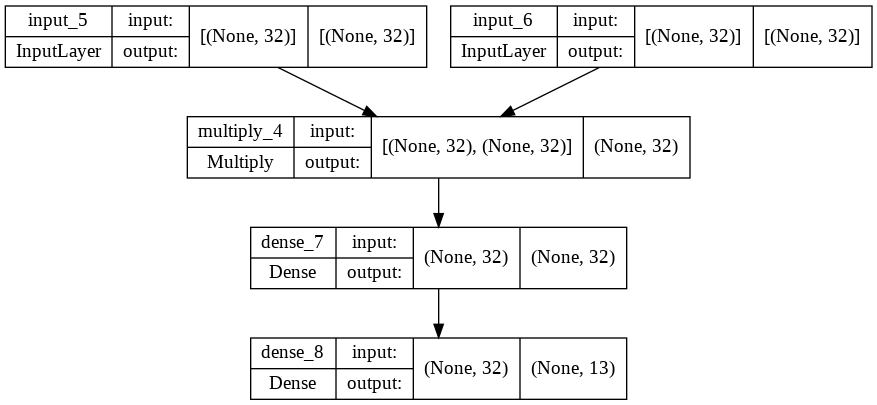

In [ ]:

tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [ ]:

from easy_vqa import get_train_questions, get_test_questions, get_answers

train_qs, train_answers, train_image_ids = get_train_questions()
test_qs, test_answers, test_image_ids = get_test_questions()

all_answers = get_answers()
num_answers = len(all_answers)

In [ ]:
from easy_vqa import get_train_image_paths, get_test_image_paths
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def load_and_proccess_image(image_path):
  
  im = img_to_array(load_img(image_path))
  return im / 255 - 0.5

def read_images(paths):
  ims = {}
  for image_id, image_path in paths.items():
    ims[image_id] = load_and_proccess_image(image_path)
  return ims

train_ims = read_images(get_train_image_paths())
test_ims = read_images(get_test_image_paths())

In [ ]:
from tensorflow.keras.utils import to_categorical

train_X_ims = [train_ims[id] for id in train_image_ids]
test_X_ims = [test_ims[id] for id in test_image_ids]

train_answer_indices = [all_answers.index(a) for a in train_answers]
test_answer_indices = [all_answers.index(a) for a in test_answers]
train_Y = to_categorical(train_answer_indices)
test_Y = to_categorical(test_answer_indices)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint('model.h5', save_best_only=True)

In [ ]:
from easy_vqa import get_train_questions, get_test_questions, get_answers


train_qs, train_answers, train_image_ids = get_train_questions()
test_qs, test_answers, test_image_ids = get_test_questions()
all_answers = get_answers()
num_answers = len(all_answers)


train_image_ids

In [ ]:

model.fit(

  [train_X_ims, train_X_seqs],
  train_Y,
  validation_data=([test_X_ims, test_X_seqs], test_Y),
  shuffle=True,
  epochs=8, 
)